In [4]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm 
pd.set_option('display.max_columns',None)
np.set_printoptions(precision=8,suppress=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier



## Loading the dataset
DATA_PATH = "./dataset.csv"
df = pd.read_csv(DATA_PATH)
df.head()

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
0,20-03-2024 00:11,Truck_7,-65.7383,11.2497,390,Delayed,27.0,67.8,Detour,38,320,4,None,60.1,285,1
1,30-10-2024 07:53,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
2,29-07-2024 18:42,Truck_10,54.9232,79.5455,190,In Transit,25.2,62.2,Detour,34,355,3,None,99.2,260,0
3,28-10-2024 00:50,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
4,27-09-2024 15:52,Truck_7,-65.8477,47.9468,480,Delayed,20.5,57.2,Clear,56,197,6,None,71.6,270,1


In [3]:
# shape of data

rows, cols = df.shape
print("The dataset has {} rows and {} columns".format(rows,cols))

The dataset has 1000 rows and 16 columns


In [4]:
# datatypes of columns

df.dtypes

Timestamp                   object
Asset_ID                    object
Latitude                   float64
Longitude                  float64
Inventory_Level              int64
Shipment_Status             object
Temperature                float64
Humidity                   float64
Traffic_Status              object
Waiting_Time                 int64
User_Transaction_Amount      int64
User_Purchase_Frequency      int64
Logistics_Delay_Reason      object
Asset_Utilization          float64
Demand_Forecast              int64
Logistics_Delay              int64
dtype: object

In [4]:
# info about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                1000 non-null   object 
 1   Asset_ID                 1000 non-null   object 
 2   Latitude                 1000 non-null   float64
 3   Longitude                1000 non-null   float64
 4   Inventory_Level          1000 non-null   int64  
 5   Shipment_Status          1000 non-null   object 
 6   Temperature              1000 non-null   float64
 7   Humidity                 1000 non-null   float64
 8   Traffic_Status           1000 non-null   object 
 9   Waiting_Time             1000 non-null   int64  
 10  User_Transaction_Amount  1000 non-null   int64  
 11  User_Purchase_Frequency  1000 non-null   int64  
 12  Logistics_Delay_Reason   1000 non-null   object 
 13  Asset_Utilization        1000 non-null   float64
 14  Demand_Forecast          

In [5]:
# missing values in data

df.isna().sum()

Timestamp                  0
Asset_ID                   0
Latitude                   0
Longitude                  0
Inventory_Level            0
Shipment_Status            0
Temperature                0
Humidity                   0
Traffic_Status             0
Waiting_Time               0
User_Transaction_Amount    0
User_Purchase_Frequency    0
Logistics_Delay_Reason     0
Asset_Utilization          0
Demand_Forecast            0
Logistics_Delay            0
dtype: int64

In [6]:
df['Logistics_Delay'].value_counts(normalize=1)

1    0.566
0    0.434
Name: Logistics_Delay, dtype: float64

In [7]:
#Features
print(df.columns.to_frame(index=False, name='Columns'))

                    Columns
0                 Timestamp
1                  Asset_ID
2                  Latitude
3                 Longitude
4           Inventory_Level
5           Shipment_Status
6               Temperature
7                  Humidity
8            Traffic_Status
9              Waiting_Time
10  User_Transaction_Amount
11  User_Purchase_Frequency
12   Logistics_Delay_Reason
13        Asset_Utilization
14          Demand_Forecast
15          Logistics_Delay


In [13]:
column_descriptions = ["Date and time when the data was recorded", 
                       "Unique identifier for the logistical assets", 
                       "Geographical coordinates of the asset for tracking and monitoring",
                       "Geographical coordinates of the asset for tracking and monitoring",
                       "Current level of inventory associated with the asset or shipment", 
                       "Status of the shipment", 
                       "Temperature recorded at the time of the shipment or transportation",
                      "Humidity level at the time of recording",
                      "Current traffic condition",
                      "Time spent waiting during the logistics process (in minutes)",
                      "Monetary amount associated with user transactions",
                      "Frequency of purchases made by the user.",
                      "Reason for any delays in the logistics process (e.g., Weather, Mechanical Failure).",
                      "Percentage of asset utilization, indicating how effectively assets are being used.",
                      "Predicted demand for the logistics services in the coming period.",
                      "Binary variable indicating whether a logistics delay occurred (1 for delay, 0 for no delay)."]

x=0
for i,j in zip(df.columns,column_descriptions):
    x+=1
    print(x,i)
    print(j)
    print(df[i].nunique())
    print(df[i].unique())
    print('*'*80)

1 Timestamp
Date and time when the data was recorded
1000
['20-03-2024 00:11' '30-10-2024 07:53' '29-07-2024 18:42'
 '28-10-2024 00:50' '27-09-2024 15:52' '17-09-2024 06:02'
 '05-02-2024 08:38' '28-09-2024 09:08' '18-01-2024 08:27'
 '09-11-2024 00:48' '09-01-2024 23:19' '02-02-2024 22:28'
 '17-02-2024 21:14' '04-03-2024 06:44' '28-08-2024 12:19'
 '04-01-2024 22:52' '30-10-2024 17:52' '15-07-2024 15:42'
 '19-01-2024 06:42' '28-04-2024 21:23' '06-03-2024 20:00'
 '20-11-2024 16:38' '07-01-2024 09:13' '25-09-2024 15:12'
 '11-02-2024 13:30' '20-11-2024 11:22' '25-06-2024 02:26'
 '25-06-2024 00:01' '02-05-2024 02:33' '10-08-2024 00:04'
 '13-05-2024 03:20' '02-12-2024 08:32' '12-02-2024 06:23'
 '24-04-2024 06:17' '06-12-2024 19:05' '30-04-2024 11:53'
 '19-09-2024 22:53' '22-12-2024 15:08' '15-08-2024 05:45'
 '16-03-2024 11:17' '28-12-2024 11:40' '04-02-2024 18:55'
 '09-07-2024 02:12' '01-12-2024 23:54' '22-06-2024 13:26'
 '27-07-2024 15:50' '05-09-2024 14:12' '11-11-2024 22:09'
 '01-05-2024 2

In [14]:
(df=='NaN ').sum().sum()

0

In [15]:
df.Traffic_Status.value_counts()

Detour    345
Clear     328
Heavy     327
Name: Traffic_Status, dtype: int64

In [7]:
# columns in dataframe
df.columns.tolist()

['Timestamp',
 'Asset_ID',
 'Latitude',
 'Longitude',
 'Inventory_Level',
 'Shipment_Status',
 'Temperature',
 'Humidity',
 'Traffic_Status',
 'Waiting_Time',
 'User_Transaction_Amount',
 'User_Purchase_Frequency',
 'Logistics_Delay_Reason',
 'Asset_Utilization',
 'Demand_Forecast',
 'Logistics_Delay']

In [7]:
## Coorelation

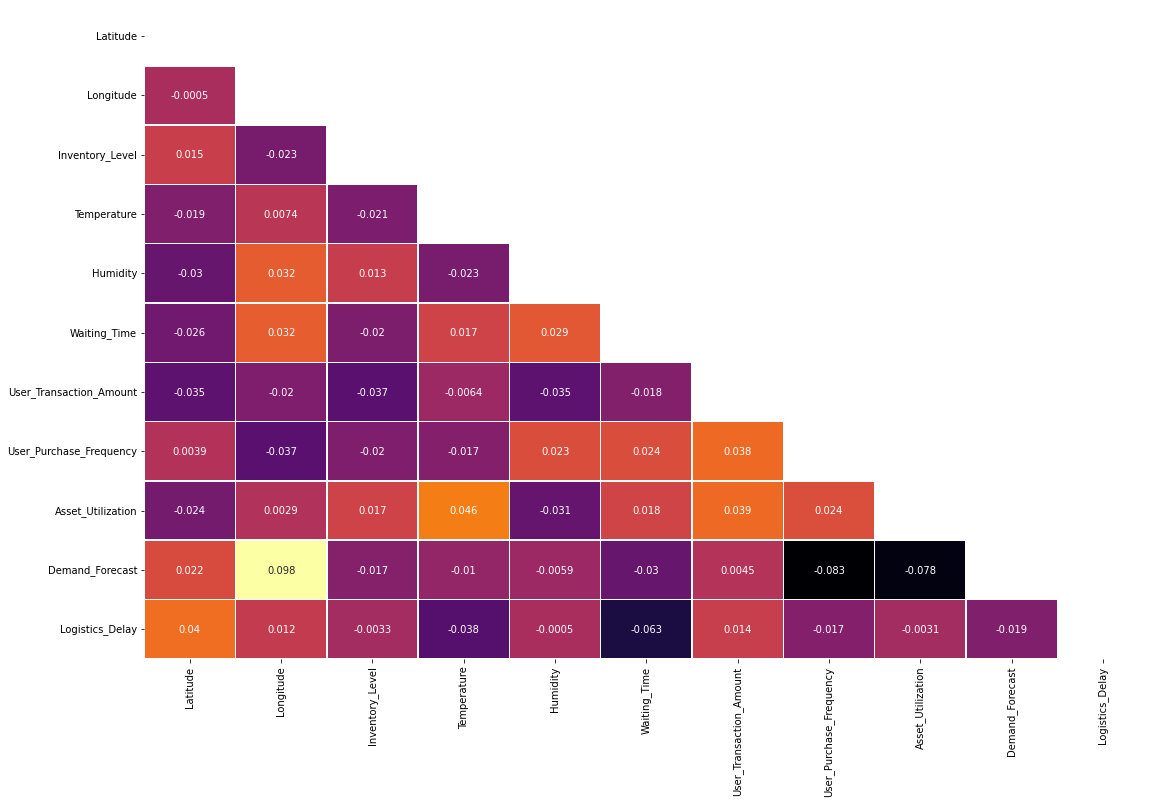

In [17]:
df_corr=df.copy()
df_corr['Logistics_Delay']=df_corr['Logistics_Delay'].astype('int')
corr_var=df_corr.select_dtypes(include=np.number).columns.to_list()
plt.rcParams['figure.figsize'] = [18,12]
sns.heatmap(df_corr[corr_var].corr(),annot=True,cmap='inferno',cbar=False,mask=np.triu(df_corr[corr_var].corr()),linewidths=0.5)    
plt.show();

In [26]:
## Non contributing features
df1=df.copy()
df1=df1.drop(['Logistics_Delay'],axis=1)

## Summary Statistics of the Dataset
num=df1.select_dtypes(include=np.number).columns.to_list()
cat=df1.select_dtypes(include='object').columns.to_list()
df1[num].describe()

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Asset_Utilization,Demand_Forecast
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-1.360093,0.837049,297.915000,23.893900,65.042200,35.062000,299.055000,5.513000,79.599100,199.284000
std,51.997183,104.843618,113.554773,3.322178,8.753765,14.477768,117.787792,2.935379,11.631153,59.920847
min,-89.791500,-179.820200,100.000000,18.000000,50.000000,10.000000,100.000000,1.000000,60.000000,100.000000
25%,-46.167975,-88.448075,201.000000,21.200000,57.200000,23.000000,191.750000,3.000000,69.475000,144.000000
50%,-4.503150,0.678300,299.000000,23.800000,65.200000,35.000000,301.500000,6.000000,79.250000,202.000000
75%,44.502800,88.156450,399.000000,26.600000,72.400000,49.000000,405.000000,8.000000,89.425000,251.250000
max,89.870100,179.923700,500.000000,30.000000,80.000000,60.000000,500.000000,10.000000,100.000000,300.000000


In [27]:
df1[cat].describe(include='object')

,Timestamp,Asset_ID,Shipment_Status,Traffic_Status,Logistics_Delay_Reason
count,1000,1000,1000,1000,1000
unique,1000,10,3,3,4
top,23-03-2024 20:27,Truck_8,Delayed,Detour,Weather
freq,1,109,350,345,267


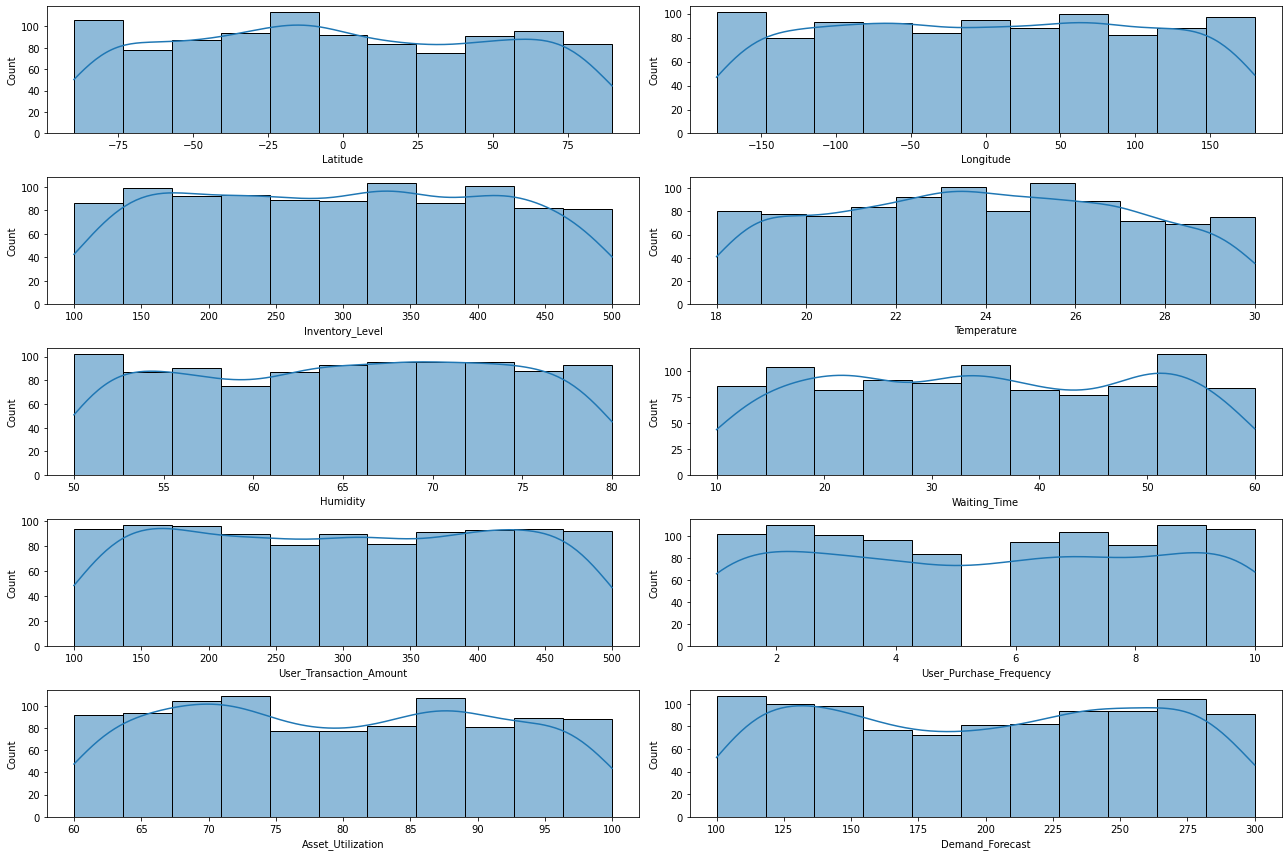

In [29]:
#Data analysis and visualisation
t=1
for i in num:
    plt.subplot(5,2,t)
    sns.histplot(df1[i],kde=True)
    t+=1
plt.tight_layout()
plt.show()

In [30]:
print(f"The number of unique assets are {df1['Asset_ID'].nunique()}")

The number of unique assets are 10


In [31]:
df1['Asset_ID'].value_counts()

Truck_8     109
Truck_4     107
Truck_2     105
Truck_10    105
Truck_6     103
Truck_7     102
Truck_9      94
Truck_3      93
Truck_5      93
Truck_1      89
Name: Asset_ID, dtype: int64

In [35]:
df1.nunique().sort_values(ascending=False)

Longitude                  1000
Latitude                   1000
Timestamp                  1000
Asset_Utilization           366
Inventory_Level             366
User_Transaction_Amount     365
Humidity                    291
Demand_Forecast             200
Temperature                 121
Waiting_Time                 51
User_Purchase_Frequency      10
Asset_ID                     10
Logistics_Delay_Reason        4
Traffic_Status                3
Shipment_Status               3
dtype: int64

In [36]:
df1.select_dtypes(include=np.number).columns.to_frame(index=False,name='Numerical columns')

,Numerical columns
0,Latitude
1,Longitude
2,Inventory_Level
3,Temperature
4,Humidity
5,Waiting_Time
6,User_Transaction_Amount
7,User_Purchase_Frequency
8,Asset_Utilization
9,Demand_Forecast


In [37]:
df1.select_dtypes(include='object').columns.to_frame(index=False,name='Categorical columns')

,Categorical columns
0,Timestamp
1,Asset_ID
2,Shipment_Status
3,Traffic_Status
4,Logistics_Delay_Reason


Range

Latitude
179.6616

Longitude
359.7439

Inventory_Level
400

Temperature
12.0

Humidity
30.0

Waiting_Time
50

User_Transaction_Amount
400

User_Purchase_Frequency
9

Asset_Utilization
40.0

Demand_Forecast
200



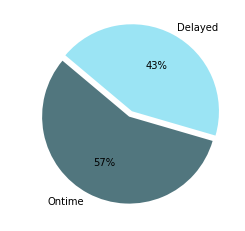

In [39]:
df1.nunique().sort_values(ascending=False)
print('Range')
print()
for i in num:
    print(i)
    print(df1[i].max()-df1[i].min())
    print()
df_dummy =df1.copy()
plt.figure(figsize=(5, 4))
df['Logistics_Delay'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4'], autopct='%1.0f%%', explode=(0.02, 0.05),
    startangle=140, ylabel=' ', labels = ['Ontime', 'Delayed'])
plt.show()

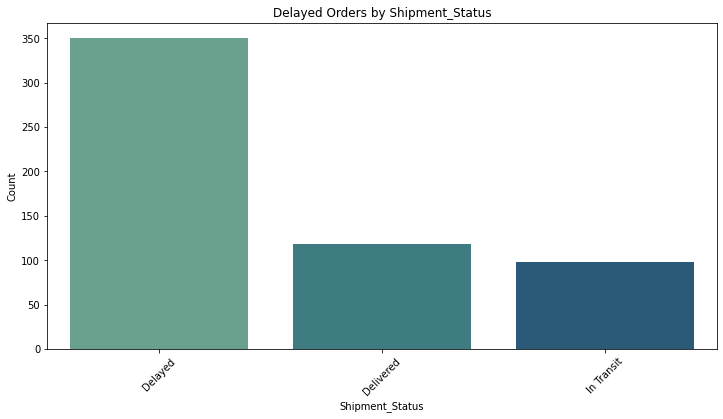

In [42]:
delayed_orders = df[df['Logistics_Delay'] == 1]

plt.figure(figsize=(12, 6))
sns.countplot(data=delayed_orders, x='Shipment_Status', order=delayed_orders['Shipment_Status'].value_counts().index, palette="crest")
plt.title("Delayed Orders by Shipment_Status")
plt.xlabel("Shipment_Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

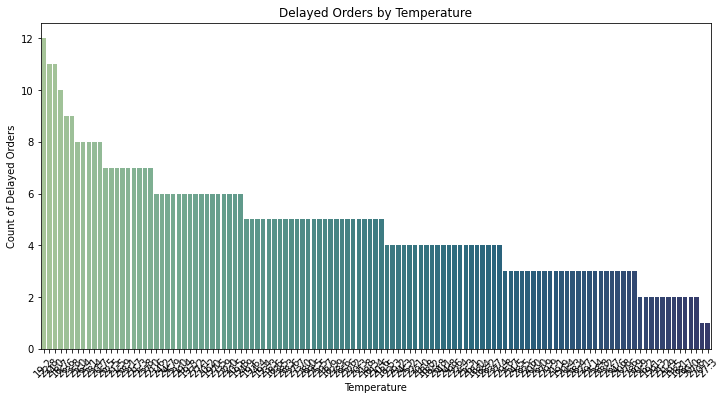

In [43]:
delayed_orders = df[df['Logistics_Delay'] == 1]

plt.figure(figsize=(12, 6))
sns.countplot(data=delayed_orders, x='Temperature', order=delayed_orders['Temperature'].value_counts().index, palette="crest")
plt.title("Delayed Orders by Temperature")
plt.xlabel("Temperature")
plt.ylabel("Count of Delayed Orders")
plt.xticks(rotation=45)
plt.show()

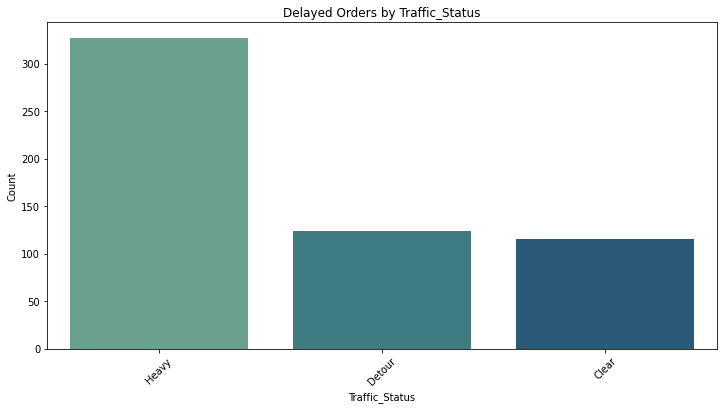

In [44]:
delayed_orders = df[df['Logistics_Delay'] == 1]

plt.figure(figsize=(12, 6))
sns.countplot(data=delayed_orders, x='Traffic_Status', order=delayed_orders['Traffic_Status'].value_counts().index, palette="crest")
plt.title("Delayed Orders by Traffic_Status")
plt.xlabel("Traffic_Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

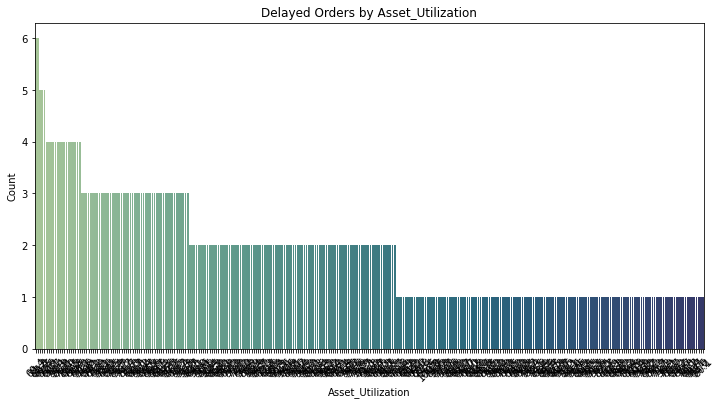

In [45]:
delayed_orders = df[df['Logistics_Delay'] == 1]

plt.figure(figsize=(12, 6))
sns.countplot(data=delayed_orders, x='Asset_Utilization', order=delayed_orders['Asset_Utilization'].value_counts().index, palette="crest")
plt.title("Delayed Orders by Asset_Utilization")
plt.xlabel("Asset_Utilization")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [46]:
## Outliers
len(df1[num].columns.to_list())

10

In [47]:
print(num)

['Latitude', 'Longitude', 'Inventory_Level', 'Temperature', 'Humidity', 'Waiting_Time', 'User_Transaction_Amount', 'User_Purchase_Frequency', 'Asset_Utilization', 'Demand_Forecast']


In [51]:
to_chk = ['Inventory_Level', 'Temperature', 'Humidity', 'Waiting_Time', 'Asset_Utilization', 'Demand_Forecast']

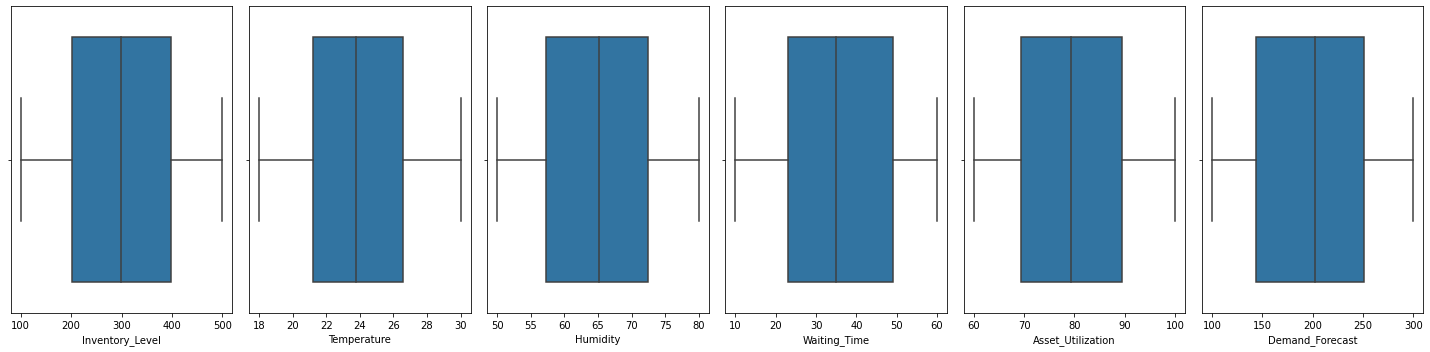

In [52]:
plt.rcParams['figure.figsize']=[20,5]
t=1
for i in to_chk:
    plt.subplot(1,6,t)
    sns.boxplot(df1[i])
    t+=1
plt.tight_layout()
plt.show()

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                1000 non-null   object 
 1   Asset_ID                 1000 non-null   object 
 2   Latitude                 1000 non-null   float64
 3   Longitude                1000 non-null   float64
 4   Inventory_Level          1000 non-null   int64  
 5   Shipment_Status          1000 non-null   object 
 6   Temperature              1000 non-null   float64
 7   Humidity                 1000 non-null   float64
 8   Traffic_Status           1000 non-null   object 
 9   Waiting_Time             1000 non-null   int64  
 10  User_Transaction_Amount  1000 non-null   int64  
 11  User_Purchase_Frequency  1000 non-null   int64  
 12  Logistics_Delay_Reason   1000 non-null   object 
 13  Asset_Utilization        1000 non-null   float64
 14  Demand_Forecast          

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical variables
df_encoded = df.copy()

# Convert categorical columns to numerical values using one-hot encoding
categorical_cols = ["Traffic_Status", "Logistics_Delay_Reason", "Shipment_Status"]
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

# Define features (excluding non-influential and identifier columns)
features = [
    "Latitude", "Longitude", "Inventory_Level", "Temperature", "Humidity",
    "Waiting_Time", "User_Transaction_Amount", "User_Purchase_Frequency",
    "Asset_Utilization", "Demand_Forecast"
]

# Add encoded categorical features
features += [col for col in df_encoded.columns if col.startswith(("Traffic_Status_", "Logistics_Delay_Reason_"))]

# Define target variable
X = df_encoded[features]
y = df_encoded["Logistics_Delay"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.73,
 '              precision    recall  f1-score   support\n\n           0       0.65      0.89      0.75        91\n           1       0.87      0.60      0.71       109\n\n    accuracy                           0.73       200\n   macro avg       0.76      0.74      0.73       200\nweighted avg       0.77      0.73      0.73       200\n')

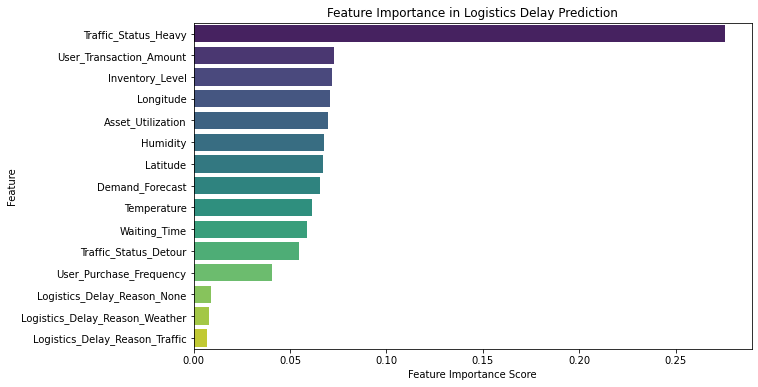

(                           Feature  Importance
 11            Traffic_Status_Heavy    0.275479
 6          User_Transaction_Amount    0.072587
 2                  Inventory_Level    0.071735
 1                        Longitude    0.070978
 8                Asset_Utilization    0.069632
 4                         Humidity    0.067481
 0                         Latitude    0.066990
 9                  Demand_Forecast    0.065426
 3                      Temperature    0.061152
 5                     Waiting_Time    0.059031
 10           Traffic_Status_Detour    0.054758
 7          User_Purchase_Frequency    0.040422
 12     Logistics_Delay_Reason_None    0.009273
 14  Logistics_Delay_Reason_Weather    0.008162
 13  Logistics_Delay_Reason_Traffic    0.006892,
 0,
 0.36,
 {'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.73,
 '              precision    recall  f1-score   support\n\n           0       0.64      0.91      0.75        91\n     

In [85]:
import numpy as np

# **Step 1: Feature Importance Analysis**

# Extract feature importance scores from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistics Delay Prediction")
plt.show()

# **Step 2: Test Model with New Data (Example Shipment Scenario)**
# Reconfirm exact feature set used in training
trained_features = X.columns.tolist()

# Create a properly formatted test case ensuring all required features exist
new_shipment_data = {feature: 0 for feature in trained_features}  # Initialize all features to 0

# Assign real values for the new shipment scenario
new_shipment_data.update({
    "Latitude": 40.7128,
    "Longitude": -74.0060,
    "Inventory_Level": 500,
    "Temperature": 25.0,
    "Humidity": 60.0,
    "Waiting_Time": 30,
    "User_Transaction_Amount": 300,
    "User_Purchase_Frequency": 5,
    "Asset_Utilization": 85.0,
    "Demand_Forecast": 250,
    "Traffic_Status_Clear": 1,  # Set traffic condition
    "Logistics_Delay_Reason_Weather": 1  # Set delay reason
})

# Convert to DataFrame with correct column order
new_shipment_df = pd.DataFrame([new_shipment_data], columns=trained_features)

# Predict whether this shipment will be delayed
predicted_delay = rf_model.predict(new_shipment_df)[0]
predicted_delay_prob = rf_model.predict_proba(new_shipment_df)[0][1]

# Display the corrected prediction
predicted_delay, predicted_delay_prob

# **Step 3: Model Optimization (Hyperparameter Tuning)**
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the optimized model
optimized_y_pred = best_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, optimized_y_pred)
optimized_classification_rep = classification_report(y_test, optimized_y_pred)

# Display results
importance_df, predicted_delay, predicted_delay_prob, best_params, optimized_accuracy, optimized_classification_rep

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features (excluding non-influential and identifier columns)
features = [
    "Latitude", "Longitude", "Inventory_Level", "Temperature", "Humidity",
    "Waiting_Time", "User_Transaction_Amount", "User_Purchase_Frequency",
    "Asset_Utilization", "Demand_Forecast"
]

# Add encoded categorical features
features += [col for col in df_encoded.columns if col.startswith(("Traffic_Status_", "Logistics_Delay_Reason_"))]

# Define target variable
X = df_encoded[features]
y = df_encoded["Logistics_Delay"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.73,
 '              precision    recall  f1-score   support\n\n           0       0.65      0.89      0.75        91\n           1       0.87      0.60      0.71       109\n\n    accuracy                           0.73       200\n   macro avg       0.76      0.74      0.73       200\nweighted avg       0.77      0.73      0.73       200\n')

In [89]:
# **Step 1: Test the Model on Unseen Data (Overfitting Check)**
from sklearn.model_selection import cross_val_score

# Perform cross-validation to check for overfitting
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring="accuracy")

# Compute mean accuracy across cross-validation folds
cv_mean_accuracy = np.mean(cv_scores)

# **Step 2: Refine Feature Selection (Remove Potential Overfitting Features)**
# Drop features that might cause overfitting (Fleet Efficiency, Weather Risk Score, etc.)
reduced_features = [
    "Latitude", "Longitude", "Inventory_Level", "Temperature", "Humidity",
    "Waiting_Time", "User_Transaction_Amount", "User_Purchase_Frequency",
    "Asset_Utilization", "Demand_Forecast"
] + [col for col in df_encoded.columns if col.startswith(("Traffic_Status_", "Logistics_Delay_Reason_"))]

# Retrain the model with reduced features
X_reduced = df_encoded[reduced_features]
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
rf_model_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_reduced.fit(X_train_red, y_train_red)

# Evaluate new reduced model
y_pred_red = rf_model_reduced.predict(X_test_red)
reduced_accuracy = accuracy_score(y_test_red, y_pred_red)
reduced_classification_rep = classification_report(y_test_red, y_pred_red)

# **Step 3: Test Model on a Specific Shipment Scenario**
# Create a properly formatted test case ensuring all required features exist
new_shipment_data = {feature: 0 for feature in reduced_features}  # Initialize all features to 0

# Assign real values for the new shipment scenario
new_shipment_data.update({
    "Latitude": 40.7128,
    "Longitude": -74.0060,
    "Inventory_Level": 500,
    "Temperature": 25.0,
    "Humidity": 60.0,
    "Waiting_Time": 30,
    "User_Transaction_Amount": 300,
    "User_Purchase_Frequency": 5,
    "Asset_Utilization": 85.0,
    "Demand_Forecast": 250,
    "Traffic_Status_Clear": 1,  # Set traffic condition
    "Logistics_Delay_Reason_Weather": 1  # Set delay reason
})

# Convert to DataFrame with correct column order
new_shipment_df = pd.DataFrame([new_shipment_data], columns=reduced_features)

# Predict whether this shipment will be delayed
predicted_delay = rf_model_reduced.predict(new_shipment_df)[0]
predicted_delay_prob = rf_model_reduced.predict_proba(new_shipment_df)[0][1]

In [90]:
# Create a DataFrame to display the results in a structured format
results_df = pd.DataFrame({
    "Metric": ["Cross-Validation Scores", "Mean Cross-Validation Accuracy", "Reduced Model Accuracy", 
               "Predicted Delay", "Predicted Delay Probability"],
    "Value": [str(cv_scores), cv_mean_accuracy, reduced_accuracy, 
              predicted_delay, predicted_delay_prob]
})

# Display classification report as a separate DataFrame for clarity
classification_report_df = pd.DataFrame([line.split() for line in reduced_classification_rep.split("\n")[2:-5]],
                                        columns=["Class", "Precision", "Recall", "F1-Score", "Support"])

# Convert numerical columns to appropriate types
classification_report_df = classification_report_df.apply(pd.to_numeric, errors='ignore')

In [91]:
results_df

,Metric,Value
0,Cross-Validation Scores,[0.75 0.72 0.715 0.755 0.77 ]
1,Mean Cross-Validation Accuracy,0.742
2,Reduced Model Accuracy,0.73
3,Predicted Delay,0
4,Predicted Delay Probability,0.36


In [92]:
classification_report_df

,Class,Precision,Recall,F1-Score,Support
0,0,0.65,0.89,0.75,91
1,1,0.87,0.60,0.71,109



=== Classification Report (Delay Prediction) ===
Accuracy: 0.485
              precision    recall  f1-score   support

       False       0.50      0.54      0.52       104
        True       0.46      0.43      0.44        96

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200


=== Regression Report (Waiting Time Prediction) ===
Mean Absolute Error (MAE): 12.974011919772025

=== Safety Stock Recommendations ===
   Asset_ID  Suggested_Safety_Stock
9   Truck_9               25.743484
0   Truck_1               25.659511
3   Truck_3               25.103294
4   Truck_4               24.652688
8   Truck_8               24.235038
2   Truck_2               23.903680
7   Truck_7               22.942112
1  Truck_10               22.756250
5   Truck_5               22.437974
6   Truck_6               21.226387


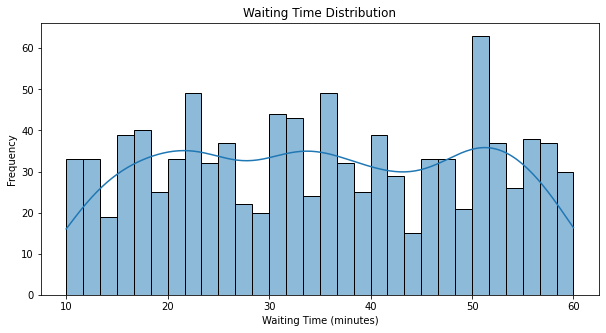

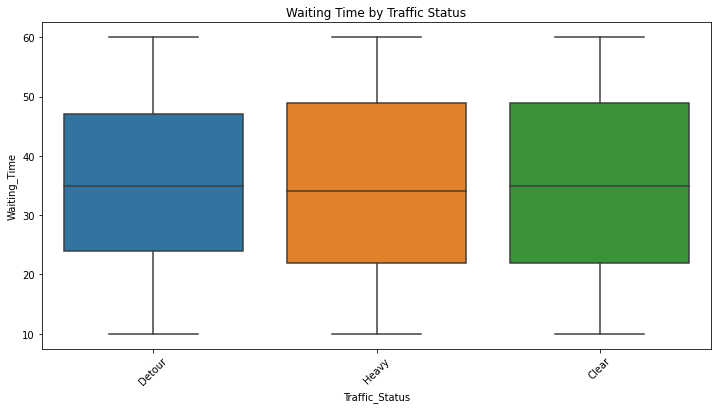

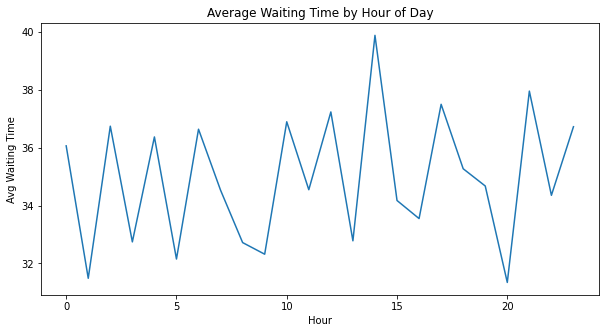

Asset Summary (Top 3 Assets)
📦 Asset `Truck_7`:
- Median waiting time: 38.50 min
- Most frequent traffic status: Heavy
- Delays often correlate with high env stress and low inventory.

📦 Asset `Truck_6`:
- Median waiting time: 35.00 min
- Most frequent traffic status: Clear
- Delays often correlate with high env stress and low inventory.

📦 Asset `Truck_10`:
- Median waiting time: 32.00 min
- Most frequent traffic status: Heavy
- Delays often correlate with high env stress and low inventory.



In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, IsolationForest
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df = df.dropna(subset=['Timestamp'])
## List top 3 assets with delay reasons
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month
df['Shipment_Status_Code'] = df['Shipment_Status'].astype('category').cat.codes
df['Traffic_Status_Code'] = df['Traffic_Status'].astype('category').cat.codes
df['Env_Stress'] = df['Temperature'] * df['Humidity']
df['Route_Code'] = df['Latitude'].round(1).astype(str) + '_' + df['Longitude'].round(1).astype(str)
df['Is_Delayed'] = df['Waiting_Time'] > df['Waiting_Time'].median()

# Anomaly Detection (Isolation Forest)
iso = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly_Score'] = iso.fit_predict(df[['Temperature', 'Humidity', 'Waiting_Time']].dropna())

# Pressure Index (Demand-Supply)
asset_wait = df.groupby('Asset_ID')['Waiting_Time'].mean()
asset_inv = df.groupby('Asset_ID')['Inventory_Level'].mean()
df['Pressure_Index'] = df['Asset_ID'].map(asset_wait / asset_inv)

# PCA-based Weather Risk Score
weather_data = df[['Temperature', 'Humidity', 'Env_Stress']].dropna()
pca = PCA(n_components=1)
df.loc[weather_data.index, 'Weather_Risk_Score'] = pca.fit_transform(weather_data)

# Classification – Delay Prediction
features_clf = ['Inventory_Level', 'Temperature', 'Humidity', 'Traffic_Status_Code',
                'Hour', 'DayOfWeek', 'Month', 'Shipment_Status_Code', 'Env_Stress',
                'Weather_Risk_Score', 'Pressure_Index']

clf_df = df.dropna(subset=features_clf + ['Is_Delayed'])
X = clf_df[features_clf]
y = clf_df['Is_Delayed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n=== Classification Report (Delay Prediction) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Regression – Predict Waiting Time
reg_df = df.dropna(subset=features_clf + ['Waiting_Time'])
Xr = reg_df[features_clf]
yr = reg_df['Waiting_Time']
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)
reg = GradientBoostingRegressor()
reg.fit(Xr_train, yr_train)
ypred_r = reg.predict(Xr_test)

print("\n=== Regression Report (Waiting Time Prediction) ===")
print("Mean Absolute Error (MAE):", mean_absolute_error(yr_test, ypred_r))

# Safety Stock Recommendation
safety_df = df.groupby('Asset_ID').agg({
    'Inventory_Level': 'mean',
    'Waiting_Time': 'std'
}).reset_index()

safety_df.columns = ['Asset_ID', 'Avg_Inventory', 'WaitTime_Std']
safety_df['Suggested_Safety_Stock'] = 1.65 * safety_df['WaitTime_Std']

print("\n=== Safety Stock Recommendations ===")
print(safety_df[['Asset_ID', 'Suggested_Safety_Stock']].sort_values(by='Suggested_Safety_Stock', ascending=False))

# Visualizations
plt.figure(figsize=(10, 5))
sns.histplot(df['Waiting_Time'], kde=True, bins=30)
plt.title("Waiting Time Distribution")
plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Traffic_Status', y='Waiting_Time', data=df)
plt.title("Waiting Time by Traffic Status")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Hour', y='Waiting_Time', data=df.groupby('Hour')['Waiting_Time'].mean().reset_index())
plt.title("Average Waiting Time by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Avg Waiting Time")
plt.show()

# Summary for Key Assets
print("Asset Summary (Top 3 Assets)")
for asset in df['Asset_ID'].unique()[:3]:
    sub = df[df['Asset_ID'] == asset]
    if not sub.empty:
        summary = f"📦 Asset `{asset}`:\n" \
                  f"- Median waiting time: {sub['Waiting_Time'].median():.2f} min\n" \
                  f"- Most frequent traffic status: {sub['Traffic_Status'].mode()[0]}\n" \
                  f"- Delays often correlate with high env stress and low inventory.\n"
        print(summary)